# Laboratorio de regresión - 1

## Regresión lineal simple

|                |   |
:----------------|---|
| **Nombre**     |Nicolás Martínez Gutiérrez   |
| **Fecha**      25/08/2025|   |
| **Expediente**751746 |   |

La regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. Sirve como un punto de partida a pesar de que existen soluciones más modernas.

Observa la siguiente gráfica.

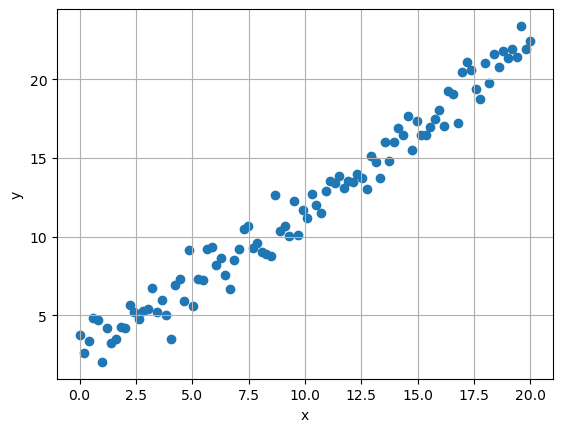

In [53]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(0, 20, 100); y = 2 + x + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

**¿Hay alguna relación entre $y$ y $x$?**

Sí, al observar la gráfica se nota claramente que conforme x aumenta, y también tiende a aumentar. Los puntos siguen una trayectoria ascendente bastante definida, lo que indica que existe una relación positiva y casi lineal entre ambas variables. Aunque hay algo de dispersión, la tendencia general es muy clara.

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- **¿Por qué?**

Porque los puntos no están distribuidos al azar, sino que se concentran alrededor de una línea recta ascendente. Eso muestra que el valor de x influye en el valor de y

- Si hubiera una asociación, **¿qué tan fuerte es?**

La asociación es fuerte, ya que la mayoría de los puntos se agrupan cerca de esa línea ascendente y no se dispersan demasiado lejos. Esto significa que con solo conocer x podemos tener una buena idea de cuánto valdrá y.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$


A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir el resultado de la variable $y$ basándonos en $x$
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

Nuestros datos contienen 200 muestras en pares ordenados $(x_i, y_i)$. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

**¿Qué significa "que se ajuste bien"?**

Un buen ajuste es cuando la línea estimada pasa cerca de la mayoría de los puntos. Eso significa que los errores son pequeños. La mejor línea es la que minimiza la suma de los errores al cuadrado, porque así reparte los errores de la forma más eficiente.

Observa las 3 propuestas de lineas para ajustar los puntos.

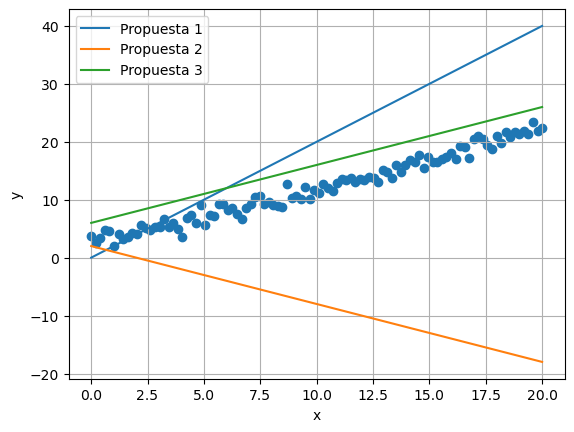

In [54]:
y_pred1 = 2*x; y_pred2 = -x + 2; y_pred3 = 6 + x
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred1, label="Propuesta 1"); plt.plot(x, y_pred2, label="Propuesta 2"); plt.plot(x, y_pred3, label="Propuesta 3")
plt.legend(loc="best")
plt.show()

Claramente hay una línea que se ajusta mejor que las otras dos. ¿Cómo sabemos que esa línea es mejor que las otras?

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza `sklearn` para estimar los parámetros del modelo.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [56]:
np.random.seed(0)
x = np.linspace(0, 20, 100)
y = 2 + x + np.random.normal(0, 1, 100)

In [57]:
X = x.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [58]:
lr.intercept_

np.float64(2.208471447842209)

In [59]:
lr.coef_

array([0.98513366])

In [60]:
y_pred = lr.predict(X)

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_22132\2763875248.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


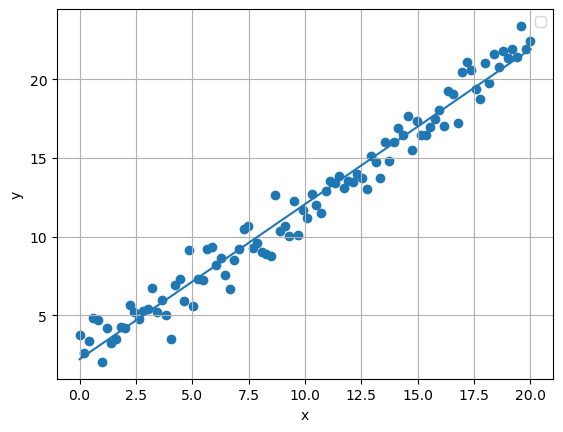

In [61]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### Parametros del modelo
$$ \hat{\beta_1} = 0.98513366 $$

$$ \hat{\beta_0} = 2.208471447842209 $$

$$\hat{y} = 2.208471447842209 + 0.98513366x $$

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `sklearn` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [62]:
import numpy as np

In [63]:
x_bar = np.mean(x)
y_bar = np.mean(y)

In [64]:
beta1 = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2)
beta0 = y_bar - beta1 * x_bar

In [65]:
beta1

np.float64(0.985133656769228)

In [66]:
beta0

np.float64(2.2084714478422054)

#### Comparación con el modelo sklearn

Al comparar los resultados obtenidos, se obesrva que con sklearn los valores de los parámetros son aproximadamente B0 = 2.2085 y B1 = 0.9851. Al aplicar la fórmula manual, los resultados son prácticamente los mismos, B0 = 2.2085 y B1 = 0.9851. Esto confirma que ambos métodos calculan los parámetros del modelo de regresión lineal bajo el criterio de mínimos cuadrados.

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_22132\2763875248.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


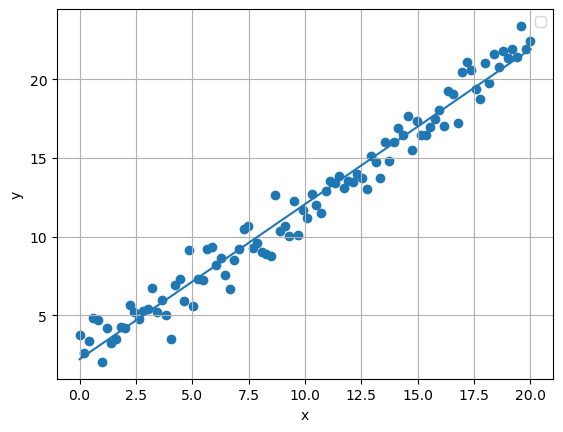

In [67]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Verificando la precisión del modelo

¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

El estadístico $R^2$ se puede encontrar accediendo a la función `score` del objeto `LinearRegression` de `sklearn`.

- **¿Cuánta varianza queda sin explicar?**

In [68]:
from sklearn.metrics import r2_score

In [69]:
y_hat = lr.predict(X)

In [70]:
r2_score(y, y_hat)

0.9703537814132045

In [71]:
1 - r2_score(y, y_hat)

0.029646218586795503

De acuerdo a nuestro R2 el modelo explica 0.9703537814132045 de la variabilidad en los datos de y. La varianza que queda sin explicar es de 0.029646218586795503

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3